## Regresión Gaussiana (Gaussian Kernel Regression)

Estima la expectativa condicionada de una variable aleatoria. Permite encontrar **relaciones no lineales** entre variables aleatorias X e Y. Esta técnica es una regresion no lineal, no requiere de ningun aprendizaje iterativo: usa el concepto **KNN de utilizacion de vecinos cercanos a la muestra predicha**.

Dos diferencias entre KNN y regresion kernel.

- La regresion kernel toma una media ponderada de las muestras cercanas.
- La regresion kernel usa todas las muestras como vecinos.

Para ponderar las muestras cercanas se utiliza la distribucion gaussiana y esta es la razon de que se denomine Regresion kernel Gaussiana.

La regresion kernel gaussiana puede ser modelada usando las siguientes funciones:

$$
   Z_{i} = \frac{\left ( x_{i}-\mu \right )}{\sigma }  
$$

La regresion kernel usa el valor de x de la muestra de prediccion como la media de la función gaussiana, ya que el objetivo es centrar la funcion en la muestra. El algoritmo de la funcion gaussiana hace uso del paramétro __b__ para establecer la varianza de la funcion gaussiana y su distribucion resultante de los pesos.

$$
Z_{i} = \frac{\left ( x_{i}-x \right )}{b}
$$

__Función gaussiana__: $Gaussian\left ( Z_{i} \right ) = \frac{1}{\sqrt{2\pi }}exponencial(^{-z_{i}^{2}/2})$

Cada peso se obtiene aplicando la siguiente ecuación:

$$
w_{i} = \frac{Gaussian\left ( Z_{i} \right )}{\frac{1}{N}\sum_{j}^{N}Gaussian\left ( Z_{j} \right )}
$$

donde el peso asignado a la predicción __i__ (numerador) es ponderado con la media de los pesos de todas las muestras (denominador).

La predicción se obtiene como la media ponderada de los objetivos (conjunto de todas las muestras).
$$
y = \frac{\sum_{j=1}^{N}\left ( w_{i}y_{i} \right )}{\sum_{i=1}^{N}w_{i}}
$$


En el siguiente código se desarrolla la __regresion kernel gaussiana__.

- función __kernel(z)__, devuelve el valor gausssiano de __z__.
- función __w(b,i,X,x)__ implementa la obtención de los pesos. Usa la función kernel aportando la muestra a predecir __x__, como media gaussiana y el paramétro __b__, como la varianza gaussiana.
- funcion __kernel_function(b,X,y,x,figure)__ implementa la prediccion.

Al final del codigo se prueba la funcion __kernel_function__ usando diferentes valores de __varianza (7,3,0.8,0.03)__.

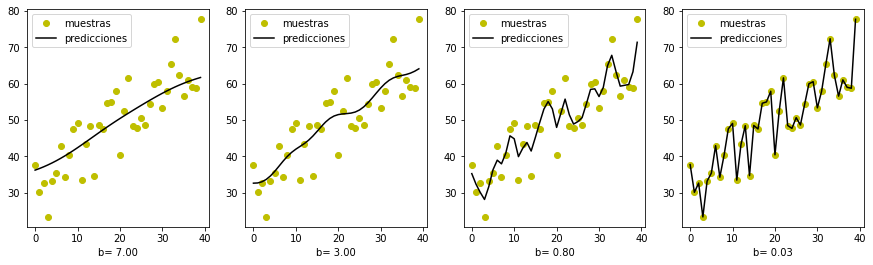

In [9]:
import matplotlib.pyplot as plt
import random
import math

# Obtención de las muestras
X = list(range(40))
y = []

for i in range(len(X)):
    y.append(20+X[i]+random.random()*20)

#Evolucion de la regresion lineal
fig, axs = plt.subplots(1,4,figsize=(15,4))

# Devuelve la prediccion de X, usando la funcion Kernel
def kernel_function(b,X,y,x,figure):
    y_pred = 0
    for i in range(len(X)):
        y_pred += w(b,i,X,x)*y[i]
    y_pred /=len(X)
    return y_pred

def w(b,i,X,x):
    denom = 0
    for j in range(len(X)):
        denom += kernel((X[j]-x)/b)
    return (len(X)*kernel((X[i]-x)/b))/denom

def kernel(z):
    return math.exp(-(z*z)/2)/math.sqrt(2*math.pi)

def plot(fig,X,y,parameters,label):
    axs[fig].plot(X,y,parameters,label=label)
    axs[fig].legend();axs[fig].grid();
    return

for b, fig in zip([7, 3, 0.8, 0.03],range(4)):
    y_prediction = []
    for x in range(len(X)):
        y_prediction.append(kernel_function(b, X, y, x, 0))
    plot(fig, X, y, 'yo', "muestras")   
                                      
    plot(fig, X, y_prediction,"k-", 'predicciones')                        
    axs[fig].set_xlabel('b= ' + '{:4.2f}'.format(b))

plt.show()

Los gráficos muestran el sobreajuste para valores bajos de varianza, debido a la forma de la funcion gaussiana: cuanto las alta sea la varianza, mayor es el numero de pesos relevantes en las muestras vecinas.